__        __   _                            _        
\ \      / /__| | ___ ___  _ __ ___   ___  | |_ ___  
 \ \ /\ / / _ \ |/ __/ _ \| '_ ` _ \ / _ \ | __/ _ \ 
  \ V  V /  __/ | (_| (_) | | | | | |  __/ | || (_) |
   \_/\_/ \___|_|\___\___/|_| |_| |_|\___|  \__\___/ 
                                                     
    ____        __                            
   / __ \____  / /_____  ____ ___  ____  ____ 
  / /_/ / __ \/ //_/ _ \/ __ `__ \/ __ \/ __ \
 / ____/ /_/ / ,< /  __/ / / / / / /_/ / / / /
/_/    \____/_/|_|\___/_/ /_/ /_/\____/_/ /_/ 
                                              
 ____       _            _           
|  _ \ ___ | | _____  __| | _____  __
| |_) / _ \| |/ / _ \/ _` |/ _ \ \/ /
|  __/ (_) |   <  __/ (_| |  __/>  < 
|_|   \___/|_|\_\___|\__,_|\___/_/\_\
                                     



Please enter the ID of the pokemon you want to view: (select frm. 1 - 1010):  10020



--------------------------------------------------------------------------------

Name: thundurus-therian
ID: 10020
Type: electric
Abilities: ['volt-absorb']
Weight: 610
Height: 30
Forms: thundurus-therian

--------------------------------------------------------------------------------



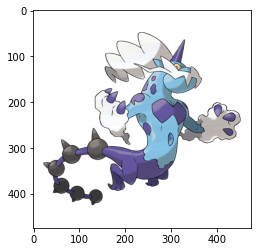

In [13]:
from pyfiglet import Figlet
from colorama import Fore, Back, Style
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests

f = Figlet(font='standard')
s = Figlet(font='slant')
print(Fore.RED + f.renderText('Welcome to') + Fore.WHITE + s.renderText('Pokemon') + Fore.RED + f.renderText('Pokedex') )

pokemon = int(input(Fore.BLACK + 'Please enter the ID of the pokemon you want to view: (select frm. 1 - 1010): ' ))


requestPokemon = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')


if requestPokemon.status_code == 200:
    pokeApi = requestPokemon.json()
    pokemonAbilities = pokeApi["abilities"]

    counter = 0
    pokemonAbilitiesArray = []
    for data in pokemonAbilities:
        pokemonAbilitiesArray.append(pokemonAbilities[counter]["ability"]["name"])
        counter += 1
    counter = 0

    pokemonData = {
        'Name': f'{pokeApi["name"]}',
        'ID': f'{pokeApi["id"]}',
        'Type': f'{pokeApi["types"][0]["type"]["name"]}',
        'Abilities': f'{pokemonAbilitiesArray}',
        'Weight': f'{pokeApi["weight"]}',
        'Height': f'{pokeApi["height"]}',
        'Forms': f'{pokeApi["forms"][0]["name"]}'}


    print("\n--------------------------------------------------------------------------------\n")
    pokeImageUrl = pokeApi["sprites"]["other"]["official-artwork"]["front_default"]
    response = requests.get(pokeImageUrl)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    for category, data in pokemonData.items():
        print(f'{category}: {data}')
    print("\n--------------------------------------------------------------------------------\n")
else:
    print("\n--------------------------------------------------------------------------------\n")
    print(Fore.RED + f.renderText('No data found'))
    print(Fore.BLACK + ("\n--------------------------------------------------------------------------------\n"))